## Practice 1

준비된 `Credit_data_risk.csv`는 성별, 직업, 자택소유 여부 등 경제적 능력에 대한 feature와 신용 리스크 label을 담고 있는 데이터다. label의 기준은 다음과 같다

- 신용이 좋은 사람 : good
- 신용이 나쁜 사람 : bad

Logit과 Probit 모형을 사용해서 아래 데이터에 대해 분류를 해 보자

In [158]:
import numpy as np
import pandas as pd

In [159]:
credit = pd.read_csv('./Credit_data_risk.csv', index_col = 0)
credit=credit.dropna()
credit.reset_index(inplace=True, drop=True)
credit

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [160]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리

SS=StandardScaler()
credit_part=credit[['Age', 'Credit amount', 'Duration']]

credit_std=SS.fit_transform(credit_part)
credit_std=pd.DataFrame(credit_std, columns=credit_part.columns)
job_df=pd.get_dummies(credit.Job, dtype=int)
job_df.columns=['job1', 'job2', 'job3', 'job4']
credit_std=pd.concat([credit_std, job_df], axis=1)
credit_std


,Age,Credit amount,Duration,job1,job2,job3,job4
0,-1.094447,0.913171,2.139356,0,0,1,0
1,0.858575,1.573037,1.657897,0,0,1,0
2,1.537887,0.543768,0.213521,0,0,1,0
3,0.009435,1.253868,1.176438,0,0,0,1
4,-0.584963,0.668155,0.694979,0,0,0,1
...,...,...,...,...,...,...,...
517,1.113317,-0.524799,0.213521,0,1,0,0
518,-0.415135,0.232459,1.176438,0,0,0,1
519,0.434005,0.197603,0.694979,0,0,0,1
520,-1.009533,-0.489943,1.898626,0,0,1,0


In [161]:
credit_obj=credit.select_dtypes(object)
credit_obj=credit_obj.iloc[:, :-1]
obj_df=pd.DataFrame()

for column in credit_obj.columns:
    temp_df=pd.get_dummies(credit_obj.loc[:, column])
    obj_df=pd.concat([obj_df, temp_df], axis=1)

credit.Risk=credit.Risk.replace({'good' : 1, 'bad' : 0})
obj_df=obj_df.astype(int)
credit_fin=pd.concat([credit_std, obj_df, credit.Risk], axis=1)



c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kumb2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

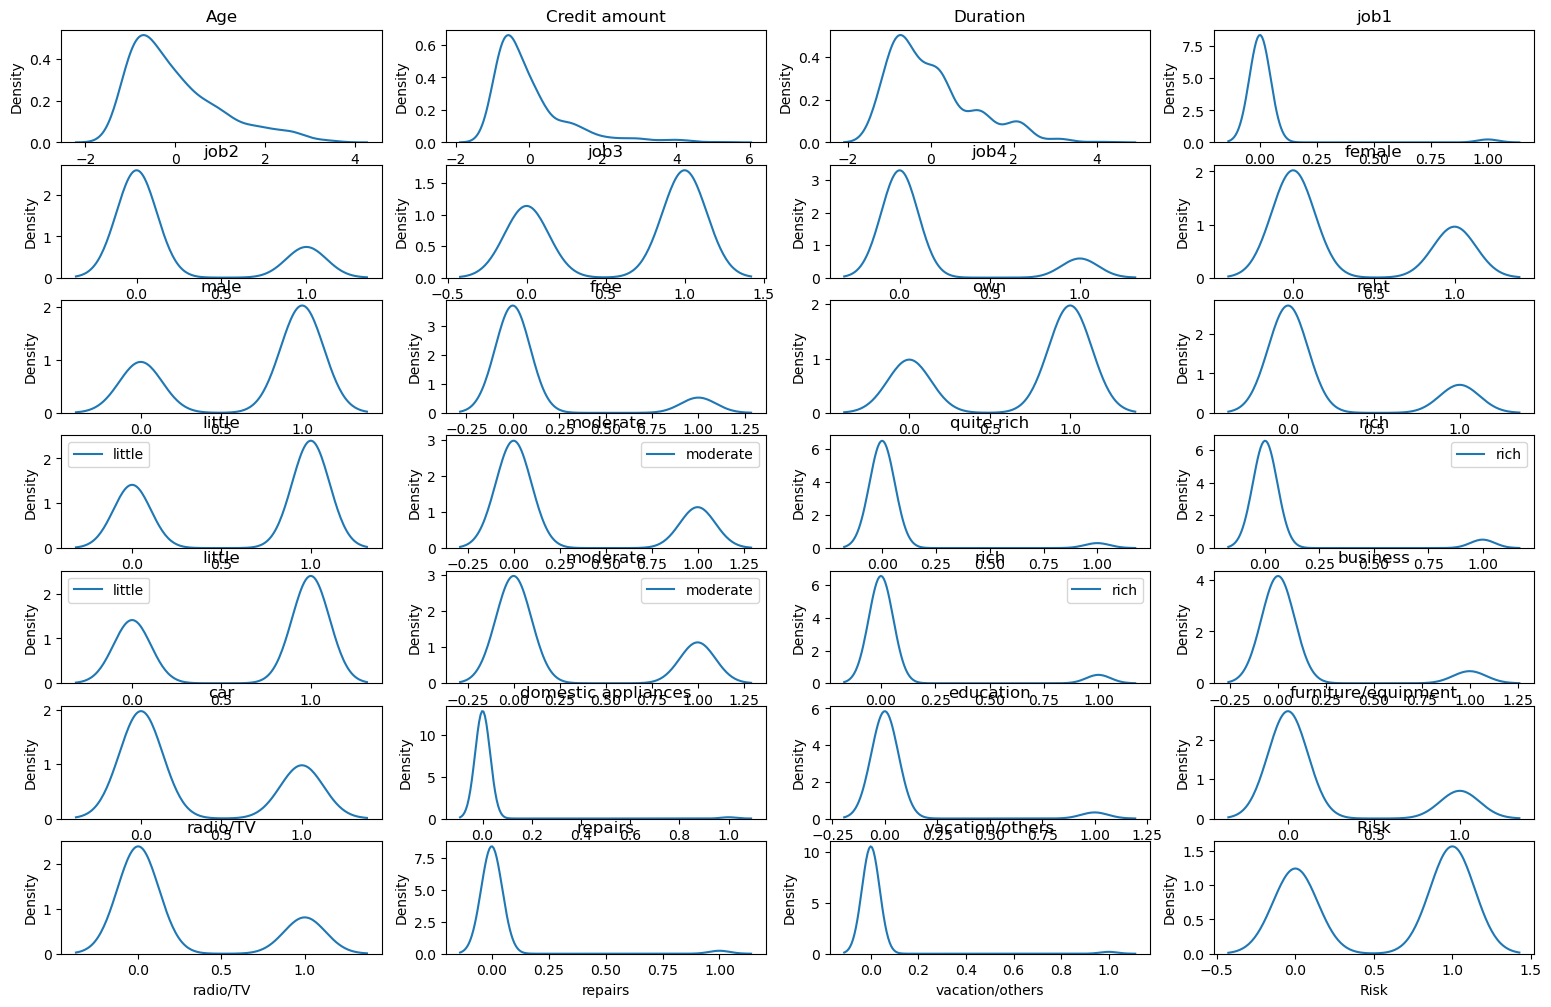

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(19,12))

for i in range(len(credit_fin.columns)):
    plt.subplot(7,4,i+1)
    sns.kdeplot(credit_fin[credit_fin.columns[i]])
    plt.title(credit_fin.columns[i])

plt.show()

In [163]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = credit_fin.drop(['Risk'], axis = 1)
X = sm.add_constant(X)
y = credit_fin['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
logit_model = sm.Logit(y_train, X_train)

result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.579481
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  365
Model:                          Logit   Df Residuals:                      343
Method:                           MLE   Df Model:                           21
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1547
Time:                        17:43:58   Log-Likelihood:                -211.51
converged:                       True   LL-Null:                       -250.22
Covariance Type:            nonrobust   LLR p-value:                 2.174e-08
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2773   6.21e+06   4.46e-08      1.000   -1.22e+07    1.22e+07
A

In [164]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        71
           1       0.59      0.66      0.63        86

    accuracy                           0.57       157
   macro avg       0.56      0.56      0.56       157
weighted avg       0.56      0.57      0.56       157



`sklearn.metrics`내의 `classification_report`를 통해 간단한 metric을 볼 수 있다. 

의사결정에서 비용이 어떤 것이 큰지에 따라 선호되는 metric이 달라질 수 있다. 이는 프로젝트의 성격에 따라 취사선택할 수 있다

Model이 얼마나 잘 분류했는지를 보는 과정 중 가장 유명한 것은 **혼동 행렬(Confusion Matrix)** 를 보는 것이다. 혼동 행렬은 아래와 같이 나타낸다

<center>

|                     | Predicted positive | Predicted negative |
|:-------------------:|:------------------:|:------------------:|
| **Actual positive** |   True Positive    |   False negative   |
| **Actual negative** |   False positive   |   True Negative    |

</center>


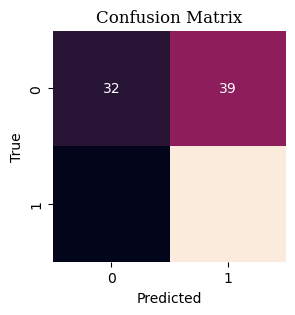

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

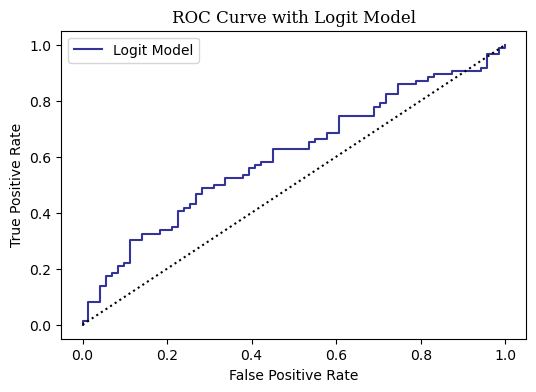

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, classification_report, roc_curve

y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Logit Model', color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.grid(False)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Logit Model', fontsize = 12, fontfamily = 'Serif')
plt.legend()
plt.show()

probit model의 경우를 살펴보자

In [167]:
probit_model = sm.Probit(y_train, X_train)

result = probit_model.fit()
print(result.summary())

         Current function value: 0.581173
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  365
Model:                         Probit   Df Residuals:                      343
Method:                           MLE   Df Model:                           21
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1522
Time:                        17:43:58   Log-Likelihood:                -212.13
converged:                      False   LL-Null:                       -250.22
Covariance Type:            nonrobust   LLR p-value:                 3.478e-08
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1734        nan        nan        nan         nan         nan
Age                     0.0440      0.

c:\Users\kumb2\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [168]:
y_pred = (result.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        71
           1       0.59      0.66      0.63        86

    accuracy                           0.57       157
   macro avg       0.56      0.56      0.56       157
weighted avg       0.56      0.57      0.56       157



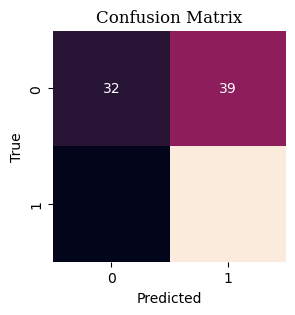

In [169]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

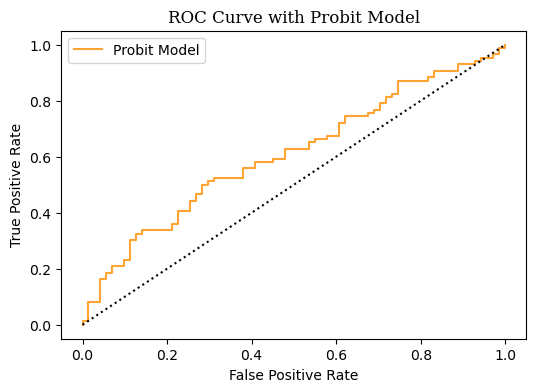

In [170]:
y_pred_prob = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Probit Model', color = 'darkorange', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Probit Model', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

## practice 2

practice 1의 분류를 Gaussian Naive Bayes Model에 대해 추정해 보자

In [171]:
from sklearn.naive_bayes import GaussianNB

X_train = X_train.drop('const', axis = 1)
X_test = X_test.drop('const', axis = 1)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [172]:
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.535031847133758


In [173]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.45      0.47        71
           1       0.57      0.60      0.59        86

    accuracy                           0.54       157
   macro avg       0.53      0.53      0.53       157
weighted avg       0.53      0.54      0.53       157



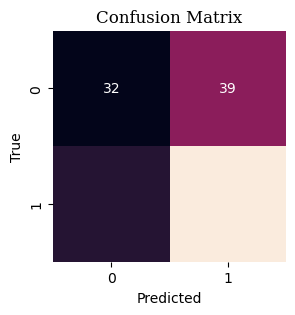

In [174]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

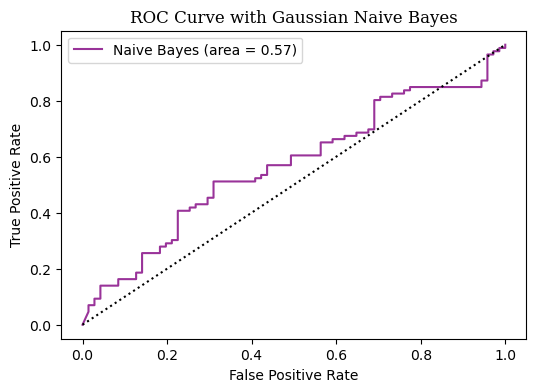

In [175]:
from sklearn.metrics import auc
y_prob = nb_model.fit(X_train, y_train).predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {:.2f})'.format(roc_auc), color = 'purple', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Gaussian Naive Bayes', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

## practice 3

practice 1의 분류 모형을 SVM으로 추정해 보자. 여기서 kernel은 선형을 가정하고, C = 0.1으로 지정한다. ROC curve를 그리기 위해 `probaility = True`로 지정한다

In [176]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',
          C = 0.1, 
          probability = True,
          random_state = 42)
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', probability=True, random_state=42)

In [177]:
y_prob = svc.predict_proba(X_test)[:, 1]
y_pred = svc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5605095541401274


In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.37      0.43        71
           1       0.58      0.72      0.64        86

    accuracy                           0.56       157
   macro avg       0.55      0.54      0.54       157
weighted avg       0.55      0.56      0.55       157



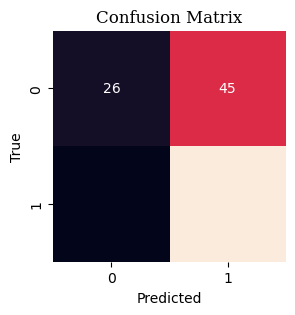

In [179]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

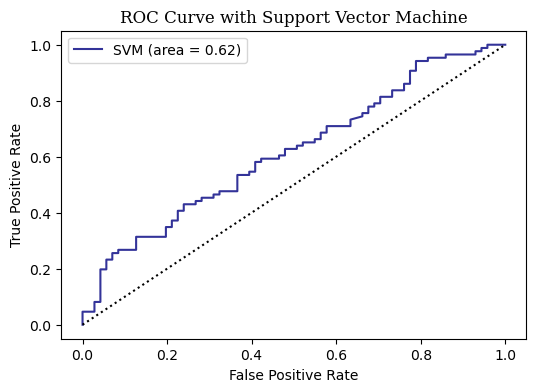

In [180]:
y_prob = svc.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'SVM (area = {:.2f})'.format(roc_auc), color = 'navy', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Support Vector Machine', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()

## practice 4

practice 1의 분류 모형을 가져와서 Decision Tree모형으로 분류를 진행해 보자. 여기서 criterion은 entropy, random_state는 42를 지정하도록 한다

In [181]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion = 'entropy',
                              random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [182]:
y_prob = tree.predict_proba(X_test)[:, 1]
y_pred = tree.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.5605095541401274


In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.54      0.52        71
           1       0.60      0.58      0.59        86

    accuracy                           0.56       157
   macro avg       0.56      0.56      0.56       157
weighted avg       0.56      0.56      0.56       157



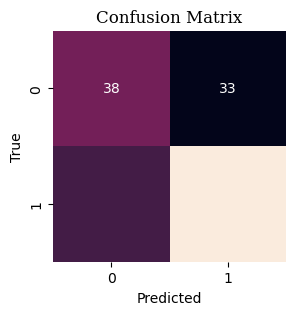

In [184]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (3, 3))
sns.heatmap(cm, annot = True, fmt = 'd', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix', fontsize = 12, fontfamily = 'Serif')
plt.show()

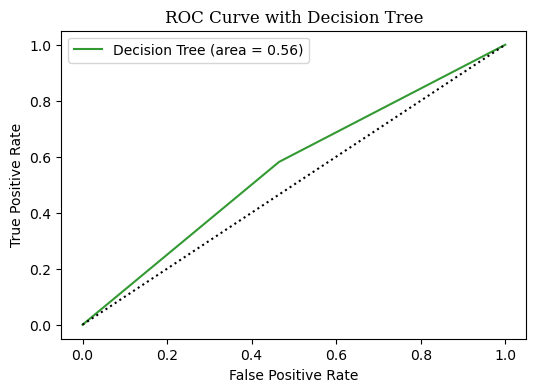

In [185]:
y_prob = tree.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, label = 'Decision Tree (area = {:.2f})'.format(roc_auc), color = 'green', alpha = 0.8)
plt.plot([0, 1], [0, 1], 'k:')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Decision Tree', fontsize = 12, fontfamily = 'Serif')
plt.grid(False)
plt.legend()
plt.show()